In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset



# Splitting the data into training and testing sets


# Rescale the predictions and actual values back to original scale

# Calculate evaluation metrics

# Plot actual vs predicted prices for the first 30 test dates


In [3]:
df = pd.read_csv('/content/stock_market_data-AAL.csv')

# Display the DataFrame
print(df.head())


         Date     Low   High  Close   Open
0  2024-11-06  13.795  14.17  14.00  14.01
1  2024-11-05  12.920  13.22  13.19  12.95
2  2024-11-04  12.960  13.50  12.99  13.50
3  2024-11-01  13.400  13.66  13.54  13.47
4  2024-10-31  13.380  13.89  13.40  13.79


In [4]:
# Features and target column
features = ['Open', 'High', 'Low']
target = 'Close'

In [5]:

# Scaling the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features + [target]])

# Function to create sequences for LSTM
def create_sequences(data, target_index, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, :-1])  # All features except target
        y.append(data[i, target_index])          # Target value
    return np.array(X), np.array(y)

# Sequence length
sequence_length = 30
X, y = create_sequences(scaled_data, target_index=-1, sequence_length=sequence_length)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Building the LSTM model
def build_lstm_model(units, dropout, optimizer, activation, batch_size, learning_rate, sequence_length, epochs):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout))

    # Second LSTM layer
    model.add(LSTM(units=units + 10, activation=activation, return_sequences=True))  # Adding 10 to units for variety
    model.add(Dropout(dropout))

    # Third LSTM layer
    model.add(LSTM(units=units + 30, activation=activation, return_sequences=True))  # Adding 30 to units for variety
    model.add(Dropout(dropout))

    # Fourth LSTM layer
    model.add(LSTM(units=units + 70, activation=activation))  # Adding 70 to units for variety
    model.add(Dropout(dropout))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model with the Adam optimizer and learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

In [7]:


# Define hyperparameters
best_hyperparams = {
    'units': 128,               # Larger number of LSTM units to capture more complex patterns
    'dropout': 0.2,             # Dropout to regularize and prevent overfitting
    'optimizer': 'adam',        # Optimizer with good default performance
    'activation': 'tanh',       # Activation function for LSTM layers
    'batch_size': 64,           # Larger batch size for stable training
    'learning_rate': 0.001,     # Adjust the learning rate for better optimization
    'sequence_length': 30,      # Increase sequence length to capture long-term dependencies
    'epochs': 100               # Train for more epochs with early stopping
}

In [8]:



# Build and train the model
model = build_lstm_model(**best_hyperparams)
model.fit(X_train, y_train, batch_size=best_hyperparams['batch_size'], epochs=best_hyperparams['epochs'], verbose=1)

# Predict on the test set
predictions = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - loss: 0.0283 - mae: 0.1051
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 330ms/step - loss: 0.0020 - mae: 0.0320
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 308ms/step - loss: 0.0019 - mae: 0.0313
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 343ms/step - loss: 0.0018 - mae: 0.0303
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 39s 313ms/step - loss: 0.0016 - mae: 0.0283
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - loss: 0.0016 - mae: 0.0276
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - loss: 0.0016 - mae: 0.0279
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - loss: 0.0013 - mae: 0.0248
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - loss: 0.0014 - mae: 0.0264
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 314ms/step - loss: 0.0014 - mae: 0.0259
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - loss: 0.0012 - mae: 0.0242
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - loss: 0.0010 - mae: 0.0224
E

In [9]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_train.reshape(-1, 1))
predictions_original = target_scaler.inverse_transform(predictions)
y_test_original = target_scaler.inverse_transform(y_test.reshape(-1, 1))


In [10]:
rmse = np.sqrt(mean_squared_error(y_test_original, predictions_original))
mse = mean_squared_error(y_test_original, predictions_original)
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

# Display metrics
print(f'RMSE: {rmse}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


RMSE: 0.012199167900010707
MSE: 0.00014881969745265163
MAE: 0.008681398972197758
R²: 0.9980362861111087


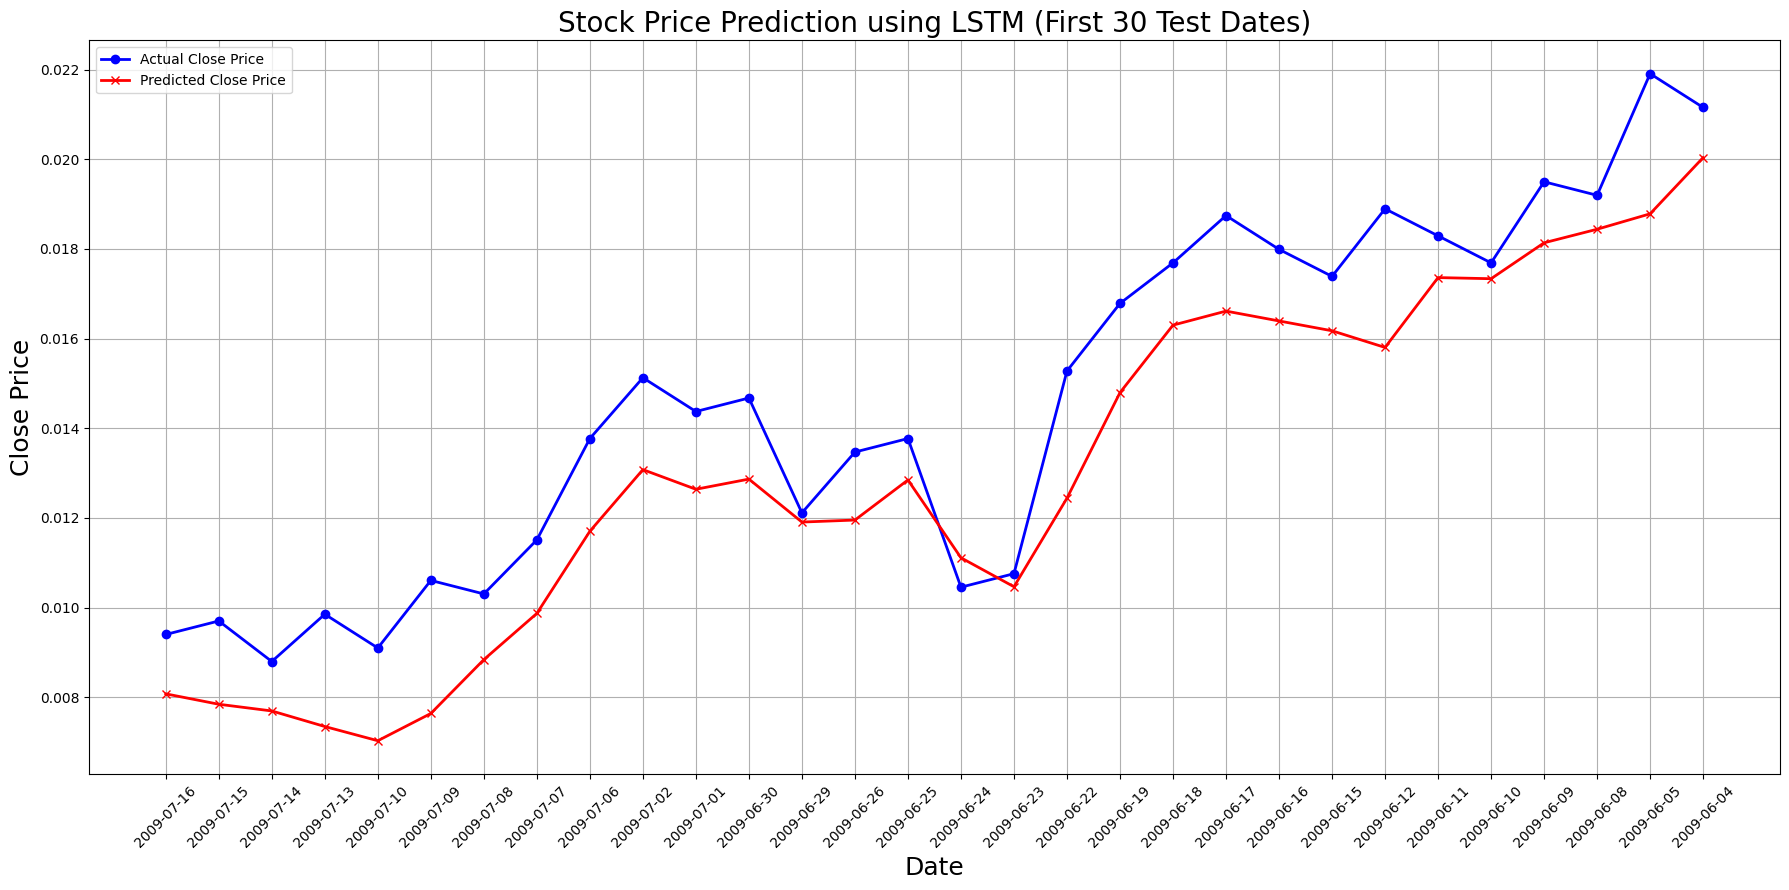

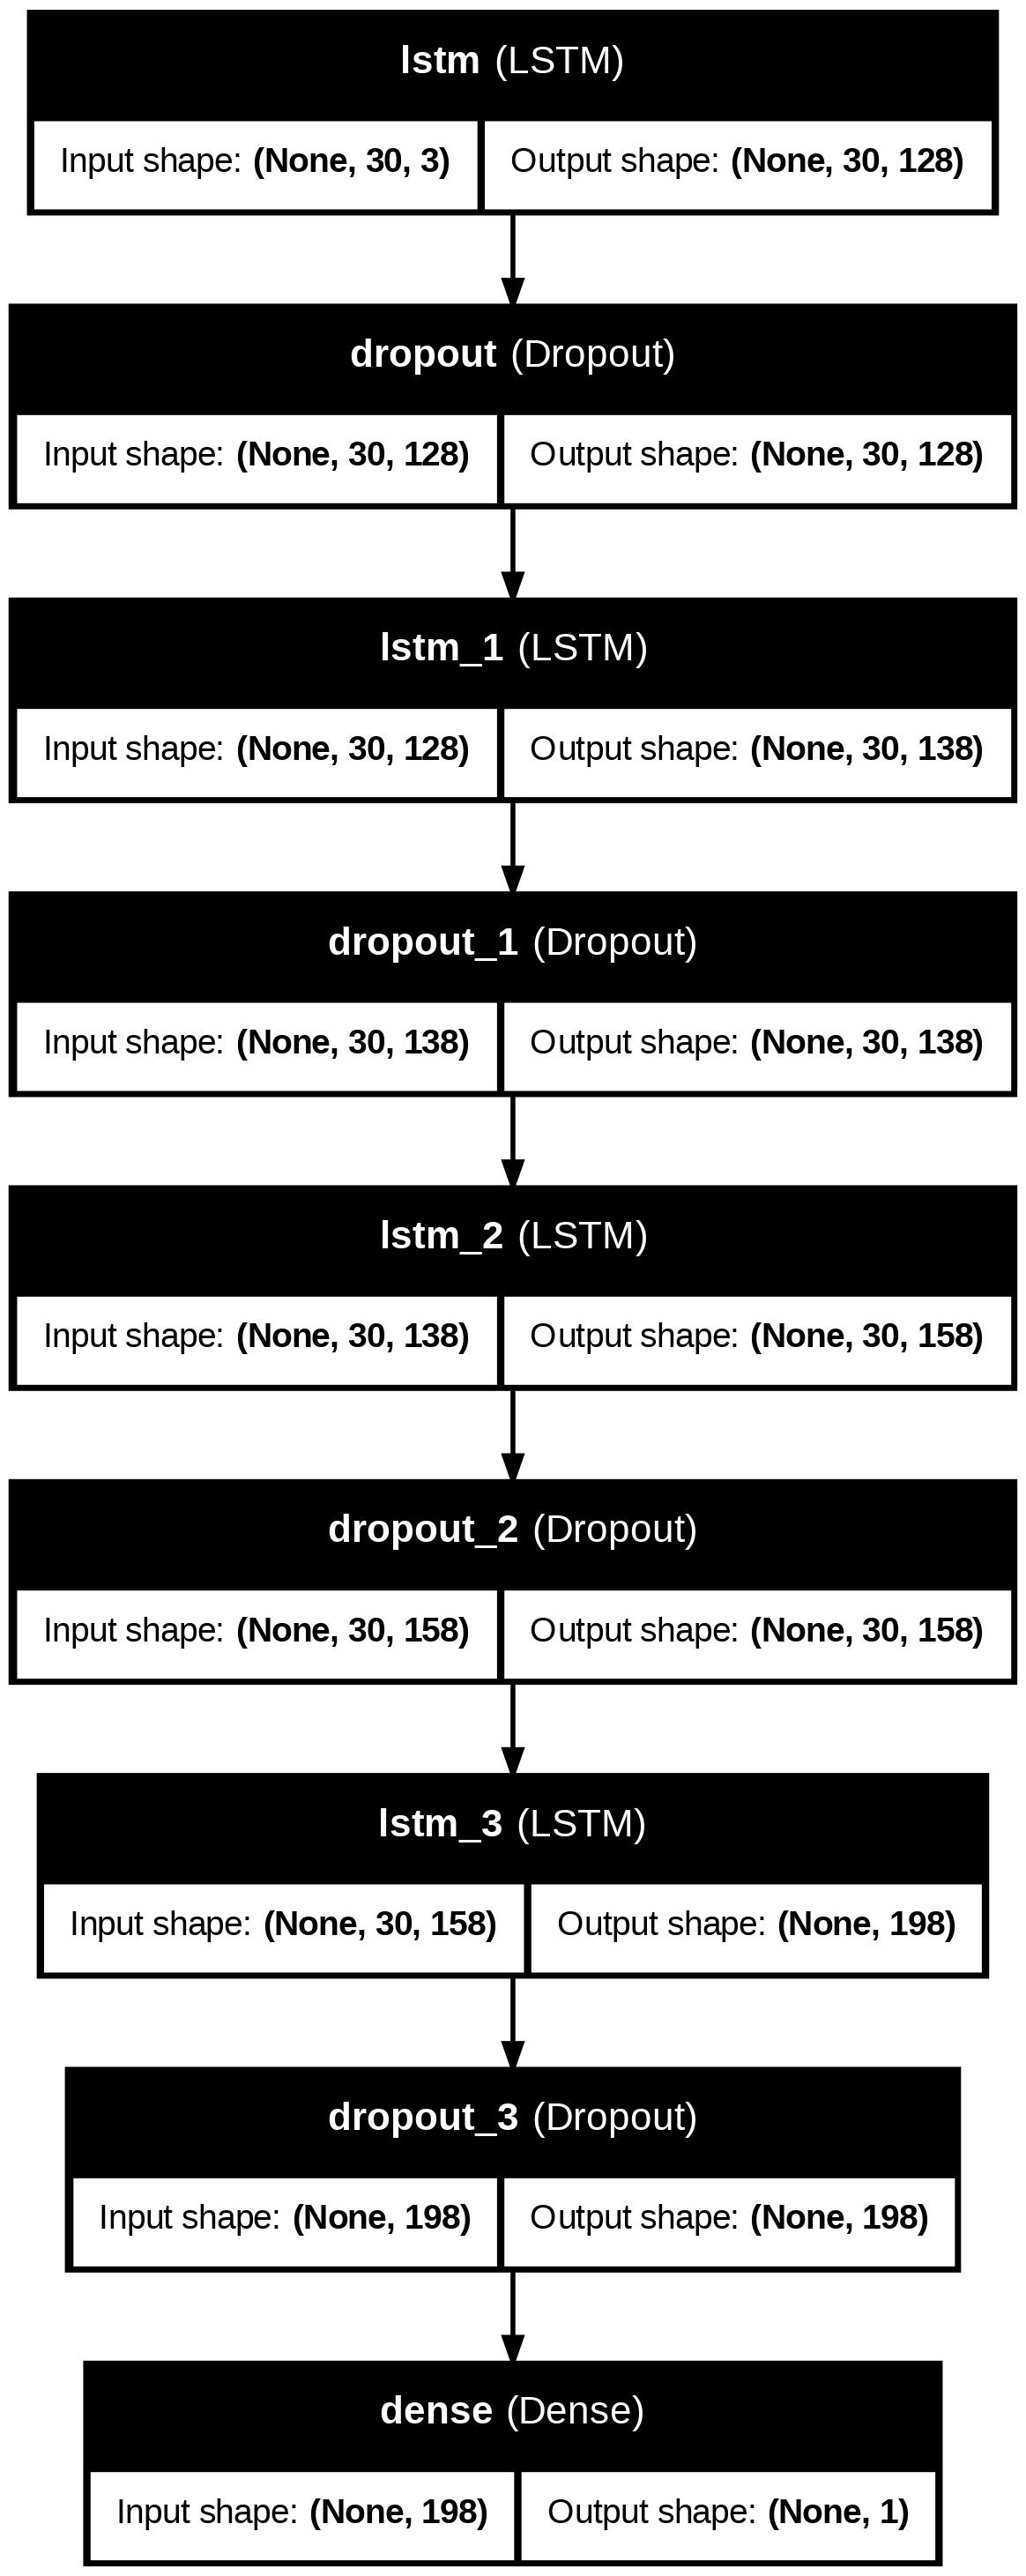

In [11]:
test_dates = df['Date'][-len(y_test_original):].reset_index(drop=True)
actual_prices = y_test_original[:30]
predicted_prices = predictions_original[:30]

plt.figure(figsize=(18, 9))
plt.plot(test_dates[:30], actual_prices, label='Actual Close Price', color='blue', marker='o', linewidth=2, markersize=6)
plt.plot(test_dates[:30], predicted_prices, label='Predicted Close Price', color='red', marker='x', linewidth=2, markersize=6)

# Formatting the plot
plt.legend()
plt.title('Stock Price Prediction using LSTM (First 30 Test Dates)', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the model architecture and save it as an image
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True)
